# Završni projektni zadatak: Analiza podataka za smanjenje ugljičnog otiska Republike Hrvatske

## 1. Prikupljanje podataka

Uvoz biblioteka

U svrhu projekta trebao sam instalirati geopandas i folium modula

In [1]:
#!pip install geopandas
#!pip install folium

from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import sqlite3
import folium

## Dohvat podataka (osunčanost i vjetar)
Dohvaćanje 10 gradova koje ćemo kroz ovaj projekt koristiti za primjer.

Dubrovnik

In [2]:
url = "https://meteo.hr/klima.php?section=klima_podaci&param=k1&Grad=dubrovnik"
soup = BeautifulSoup(requests.get(url).text, "html.parser")

tablica = soup.find("table", {"class": "table--aktualni-podaci"})

rows = tablica.find_all("tr")
headers = [th.text.strip() for th in rows[0].find_all("th")]
data = [[td.text.strip() for td in row.find_all(["th", "td"])] for row in rows[1:]]

dubrovnik_scrape = pd.DataFrame(data, columns=headers)
dubrovnik_scrape


siječanj  veljača   ožujak  travanj  svibanj  \
0         TEMPERATURA ZRAKA     None     None     None     None     None   
1              Srednja [°C]      9.2      9.6     11.5     14.5     18.7   
2        Aps. maksimum [°C]     19.2     24.1     26.8     30.3     32.9   
3         Datum(dan/godina)   2/2022  22/1990  30/2017  15/2018  29/2003   
4         Aps. minimum [°C]     -7.0     -5.2     -4.2      1.6      5.2   
5         Datum(dan/godina)  14/1968   1/1991   1/1963   8/2003   7/1989   
6      TRAJANJE OSUNČAVANJA     None     None     None     None     None   
7               Suma [sati]    130.9    142.5    181.1    214.5    270.6   
8                   OBORINA     None     None     None     None     None   
9             Količina [mm]    120.8    109.2    102.4     87.5     66.7   
10  Maks. vis. snijega [cm]        6        8        2        -        -   
11        Datum(dan/godina)  31/1963   9/1965  16/1962    - / -    - / -   
12        SREDNJI BROJ DANA     None     None     None     None     None   
13                   vedrih        8        8        8        7        8   
14                 s maglom        0        0        0        0        0   
15                  s kišom       12       11       11       11       10   
16                 s mrazom        1        0        0        0        0   
17              sa snijegom        1        0        0        0        0   
18   ledenih (tmin ≤ -10°C)        0        0        0        0        0   
19    studenih (tmax < 0°C)        0        0        0        0        0   
20     hladnih (tmin < 0°C)        1        1        0        0        0   
21     toplih (tmax ≥ 25°C)        0        0        0        0        5   
22     vrućih (tmax ≥ 30°C)        0        0        0        0        0   

     lipanj   srpanj  kolovoz    rujan listopad  studeni prosinac  
0      None     None     None     None     None     None     None  
1      22.7     25.3     25.4     21.9     18.0     14.1     10.6  
2      37.5     37.9     38.6     34.2     30.5     25.4     20.4  
3   28/2019  13/2017   7/2022  18/2020   1/2012   3/2004  17/2022  
4      10.0     14.1     14.1      8.5      4.5     -1.0     -6.0  
5    8/2005   2/1962  27/1969  17/1971  23/1972  30/1973  17/1961  
6      None     None     None     None     None     None     None  
7     309.4    350.9    332.7    254.7    201.6    132.2    119.9  
8      None     None     None     None     None     None     None  
9      55.5     32.0     65.0     96.2    125.2    142.8    138.8  
10        -        -        -        -        -        -        7  
11    - / -    - / -    - / -    - / -    - / -    - / -   2/1973  
12     None     None     None     None     None     None     None  
13       12       19       19       14       12        7        8  
14        0        0        0        0        0        0        0  
15        7        4        5        7       10       13       13  
16        0        0        0        0        0        0        0  
17        0        0        0        0        0        0        0  
18        0        0        0        0        0        0        0  
19        0        0        0        0        0        0        0  
20        0        0        0        0        0        0        0  
21       19       30       29       19        3        0        0  
22        3       11       13        2        0        0        0

Hvar

In [3]:
url = "https://meteo.hr/klima.php?section=klima_podaci&param=k1&Grad=hvar"
soup = BeautifulSoup(requests.get(url).text, "html.parser")
tablica = soup.find("table", {"class": "table--aktualni-podaci"})

rows = tablica.find_all("tr")
headers = [th.text.strip() for th in rows[0].find_all("th")]
data = [[td.text.strip() for td in row.find_all(["th", "td"])] for row in rows[1:]]

hvar_scrape = pd.DataFrame(data, columns=headers)
hvar_scrape

siječanj  veljača   ožujak  travanj  svibanj  \
0         TEMPERATURA ZRAKA     None     None     None     None     None   
1              Srednja [°C]      8.7      9.1     11.1     14.3     18.5   
2        Aps. maksimum [°C]     19.6     23.4     24.5     27.8     33.0   
3         Datum(dan/godina)  30/1949  22/1990  30/2017  26/1952  15/1945   
4         Aps. minimum [°C]     -7.0     -5.5     -4.6      0.0      5.1   
5         Datum(dan/godina)  24/1942   2/1929   4/1949   7/1929   4/1935   
6      TRAJANJE OSUNČAVANJA     None     None     None     None     None   
7               Suma [sati]    132.0    148.9    196.7    232.7    290.4   
8                   OBORINA     None     None     None     None     None   
9             Količina [mm]     75.9     64.1     66.1     56.1     43.7   
10  Maks. vis. snijega [cm]        5       13        4        -        -   
11        Datum(dan/godina)  17/1929  16/1942  12/1956    - / -    - / -   
12        SREDNJI BROJ DANA     None     None     None     None     None   
13                   vedrih        8        8        8        8        9   
14                 s maglom        0        0        0        0        0   
15                  s kišom       10        9       10        9        8   
16                 s mrazom        1        1        0        0        0   
17              sa snijegom        0        0        0        0        0   
18   ledenih (tmin ≤ -10°C)        0        0        0        0        0   
19    studenih (tmax < 0°C)        0        0        0        0        0   
20     hladnih (tmin < 0°C)        2        1        1        0        0   
21     toplih (tmax ≥ 25°C)        0        0        0        0        6   
22     vrućih (tmax ≥ 30°C)        0        0        0        0        0   

     lipanj   srpanj  kolovoz    rujan listopad  studeni prosinac  
0      None     None     None     None     None     None     None  
1      22.5     25.2     24.9     21.7     17.7     13.6     10.3  
2      38.0     37.5     37.7     34.4     31.5     25.7     20.6  
3   28/2019  29/1945   8/1956   1/1878   1/1932   3/2004   7/1967  
4      10.0     12.8      9.7      8.0      4.9     -3.0     -5.0  
5    8/1962  11/1969  19/1949  28/1931  30/1971  29/1915  19/1927  
6      None     None     None     None     None     None     None  
7     325.3    371.6    341.8    258.6    205.4    130.5    118.9  
8      None     None     None     None     None     None     None  
9      37.2     22.0     37.0     59.4     86.8    105.1    101.4  
10        -        -        -        -        -        -        0  
11    - / -    - / -    - / -    - / -    - / -    - / -   1/1973  
12     None     None     None     None     None     None     None  
13       12       19       19       14       10        7        7  
14        0        0        0        0        0        0        0  
15        6        4        4        6        9       11       12  
16        0        0        0        0        0        0        1  
17        0        0        0        0        0        0        0  
18        0        0        0        0        0        0        0  
19        0        0        0        0        0        0        0  
20        0        0        0        0        0        0        1  
21       21       30       29       19        4        0        0  
22        4       13       12        2        0        0        0

Knin

In [4]:
url = "https://meteo.hr/klima.php?section=klima_podaci&param=k1&Grad=knin"
soup = BeautifulSoup(requests.get(url).text, "html.parser")
tablica = soup.find("table", {"class": "table--aktualni-podaci"})

rows = tablica.find_all("tr")
headers = [th.text.strip() for th in rows[0].find_all("th")]
data = [[td.text.strip() for td in row.find_all(["th", "td"])] for row in rows[1:]]

knin_scrape = pd.DataFrame(data, columns=headers)
knin_scrape

siječanj  veljača   ožujak  travanj  svibanj  \
0         TEMPERATURA ZRAKA     None     None     None     None     None   
1              Srednja [°C]      4.0      5.1      8.2     12.1     16.7   
2        Aps. maksimum [°C]     21.6     26.4     27.6     29.6     34.2   
3         Datum(dan/godina)   1/2022  24/2021  26/1977  28/2018  25/2009   
4         Aps. minimum [°C]    -18.3    -18.4    -14.0     -4.1     -0.4   
5         Datum(dan/godina)  11/1967  17/1956   7/1971   9/2003   9/1957   
6      TRAJANJE OSUNČAVANJA     None     None     None     None     None   
7               Suma [sati]    122.0    137.5    184.5    196.3    244.5   
8                   OBORINA     None     None     None     None     None   
9             Količina [mm]     86.4     77.1     74.7     86.7     87.4   
10  Maks. vis. snijega [cm]       32       24       16        6        -   
11        Datum(dan/godina)   1/1997  14/1956   1/2004   7/2021    - / -   
12        SREDNJI BROJ DANA     None     None     None     None     None   
13                   vedrih        6        6        6        4        4   
14                 s maglom        2        1        1        0        0   
15                  s kišom       10        9        9       11       12   
16                 s mrazom        7        5        3        1        0   
17              sa snijegom        2        2        1        0        0   
18   ledenih (tmin ≤ -10°C)        0        0        0        0        0   
19    studenih (tmax < 0°C)        1        1        0        0        0   
20     hladnih (tmin < 0°C)       16       12        6        1        0   
21     toplih (tmax ≥ 25°C)        0        0        0        2       11   
22     vrućih (tmax ≥ 30°C)        0        0        0        0        1   

     lipanj   srpanj  kolovoz    rujan listopad  studeni prosinac  
0      None     None     None     None     None     None     None  
1      20.6     23.3     22.8     18.3     13.6      8.9      5.3  
2      40.4     40.9     42.3     37.9     31.6     27.6     21.6  
3   28/2022  19/2007  10/2017  18/2015   7/1985   1/2004   5/1979  
4       4.3      8.1      6.8      1.0     -3.3     -8.5    -15.4  
5    1/1955  17/2000  31/2006  30/1970  20/1972  23/1995  28/1962  
6      None     None     None     None     None     None     None  
7     273.7    328.8    303.4    231.9    182.2    121.3    111.5  
8      None     None     None     None     None     None     None  
9      82.5     44.2     69.0     99.6    103.9    134.0    116.4  
10        -        -        -        -        -       14       40  
11    - / -    - / -    - / -    - / -    - / -  25/2005  31/1996  
12     None     None     None     None     None     None     None  
13        6       12       12       10        9        6        6  
14        0        0        0        1        2        2        1  
15       10        7        7        9        9       12       11  
16        0        0        0        0        2        5        8  
17        0        0        0        0        0        0        1  
18        0        0        0        0        0        0        0  
19        0        0        0        0        0        0        1  
20        0        0        0        0        1        5       12  
21       21       28       27       18        4        0        0  
22        8       18       18        5        0        0        0

Mali Lošinj

In [5]:
url = "https://meteo.hr/klima.php?section=klima_podaci&param=k1&Grad=mali_losinj"
soup = BeautifulSoup(requests.get(url).text, "html.parser")
tablica = soup.find("table", {"class": "table--aktualni-podaci"})

rows = tablica.find_all("tr")
headers = [th.text.strip() for th in rows[0].find_all("th")]
data = [[td.text.strip() for td in row.find_all(["th", "td"])] for row in rows[1:]]

mali_losinj_scrape = pd.DataFrame(data, columns=headers)
mali_losinj_scrape

siječanj  veljača   ožujak  travanj  svibanj  \
0         TEMPERATURA ZRAKA     None     None     None     None     None   
1              Srednja [°C]      7.9      8.1     10.2     13.4     17.8   
2        Aps. maksimum [°C]     17.4     20.4     24.1     27.1     34.5   
3         Datum(dan/godina)  20/2007  22/1990  31/2021  14/2024  25/2009   
4         Aps. minimum [°C]     -6.7     -4.4     -3.8      2.9      6.3   
5         Datum(dan/godina)  23/1963   7/1991   1/1963   7/2003   1/1962   
6      TRAJANJE OSUNČAVANJA     None     None     None     None     None   
7               Suma [sati]    110.0    138.4    188.9    228.8    287.8   
8                   OBORINA     None     None     None     None     None   
9             Količina [mm]     87.7     74.4     66.3     65.2     64.6   
10  Maks. vis. snijega [cm]       13       21        4        -        -   
11        Datum(dan/godina)  20/1963  10/1986   7/1976    - / -    - / -   
12        SREDNJI BROJ DANA     None     None     None     None     None   
13                   vedrih        5        6        6        6        6   
14                 s maglom        0        1        1        1        0   
15                  s kišom       11        9       10       10       10   
16                 s mrazom        1        0        0        0        0   
17              sa snijegom        0        0        0        0        0   
18   ledenih (tmin ≤ -10°C)        0        0        0        0        0   
19    studenih (tmax < 0°C)        0        0        0        0        0   
20     hladnih (tmin < 0°C)        1        1        0        0        0   
21     toplih (tmax ≥ 25°C)        0        0        0        0        6   
22     vrućih (tmax ≥ 30°C)        0        0        0        0        0   

     lipanj   srpanj  kolovoz   rujan listopad  studeni prosinac  
0      None     None     None    None     None     None     None  
1      22.1     24.7     24.4    20.6     16.7     12.6      9.3  
2      35.6     37.2     39.0    35.2     29.2     23.1     19.1  
3   12/1996  22/2015   6/2017  1/2024   5/2011   1/2004   1/2023  
4       9.7     12.7     10.0     9.7      5.0      1.1     -5.2  
5    1/1986   4/1962  28/1995  9/1971  29/1997  21/1998  17/1961  
6      None     None     None    None     None     None     None  
7     325.8    365.4    332.1   247.1    189.6    111.1     99.4  
8      None     None     None    None     None     None     None  
9      55.2     38.6     62.1    99.6    112.8    131.5    103.3  
10        -        -        -       -        -        -        3  
11    - / -    - / -    - / -   - / -    - / -    - / -  30/1996  
12     None     None     None    None     None     None     None  
13        8       13       13      10        8        4        5  
14        0        0        0       0        1        0        0  
15        8        6        6       9       10       12       11  
16        0        0        0       0        0        0        0  
17        0        0        0       0        0        0        0  
18        0        0        0       0        0        0        0  
19        0        0        0       0        0        0        0  
20        0        0        0       0        0        0        0  
21       19       28       28      14        1        0        0  
22        5       13       12       1        0        0        0

Osijek

In [6]:
url = "https://meteo.hr/klima.php?section=klima_podaci&param=k1&Grad=osijek"
soup = BeautifulSoup(requests.get(url).text, "html.parser")
tablica = soup.find("table", {"class": "table--aktualni-podaci"})

rows = tablica.find_all("tr")
headers = [th.text.strip() for th in rows[0].find_all("th")]
data = [[td.text.strip() for td in row.find_all(["th", "td"])] for row in rows[1:]]

osijek_scrape = pd.DataFrame(data, columns=headers)
osijek_scrape


siječanj  veljača   ožujak  travanj  svibanj  \
0         TEMPERATURA ZRAKA     None     None     None     None     None   
1              Srednja [°C]     -0.5      1.5      6.4     11.6     16.6   
2        Aps. maksimum [°C]     19.0     23.0     28.5     31.2     36.0   
3         Datum(dan/godina)  11/1903  23/1903  31/2024  15/2024  12/1968   
4         Aps. minimum [°C]    -27.1    -26.4    -21.0     -6.8     -3.0   
5         Datum(dan/godina)  31/1987  12/1935   4/1987   9/2003   3/1935   
6      TRAJANJE OSUNČAVANJA     None     None     None     None     None   
7               Suma [sati]     62.4     90.5    145.6    185.5    226.4   
8                   OBORINA     None     None     None     None     None   
9             Količina [mm]     45.3     42.3     44.7     57.7     71.3   
10  Maks. vis. snijega [cm]       52       93       49       22        -   
11        Datum(dan/godina)  14/1918  12/1922  13/1932   1/1942    - / -   
12        SREDNJI BROJ DANA     None     None     None     None     None   
13                   vedrih        3        4        5        5        5   
14                 s maglom        6        4        2        1        0   
15                  s kišom        8        7       10       12       13   
16                 s mrazom        7        7        7        2        0   
17              sa snijegom        6        5        3        1        0   
18   ledenih (tmin ≤ -10°C)        4        3        0        0        0   
19    studenih (tmax < 0°C)        9        4        1        0        0   
20     hladnih (tmin < 0°C)       23       18       11        2        0   
21     toplih (tmax ≥ 25°C)        0        0        0        3       11   
22     vrućih (tmax ≥ 30°C)        0        0        0        0        2   

     lipanj   srpanj  kolovoz    rujan listopad  studeni prosinac  
0      None     None     None     None     None     None     None  
1      20.0     21.8     21.1     16.8     11.4      5.9      1.5  
2      39.6     40.3     40.3     37.4     30.6     25.8     21.3  
3   20/1908   1/1950  24/2012  17/2015   3/2020  16/1963  25/2009  
4       1.0      4.7      5.1     -1.2     -8.6    -15.7    -23.2  
5    9/1962  10/1948  29/1981  28/1906  30/1920  24/1988  18/1963  
6      None     None     None     None     None     None     None  
7     251.4    280.6    265.0    194.1    152.6     75.0     53.1  
8      None     None     None     None     None     None     None  
9      82.1     61.0     58.7     56.3     58.9     60.2     54.2  
10        -        -        -        -        -       40       60  
11    - / -    - / -    - / -    - / -    - / -  11/1921  28/1917  
12     None     None     None     None     None     None     None  
13        6        9       11        9        7        3        2  
14        0        1        1        2        5        6        7  
15       12       10        9        9       10       11       10  
16        0        0        0        0        3        6        8  
17        0        0        0        0        0        2        5  
18        0        0        0        0        0        0        1  
19        0        0        0        0        0        1        6  
20        0        0        0        0        2        8       18  
21       18       24       23       13        3        0        0  
22        6       11       11        3        0        0        0

Pag

In [7]:
url = "https://meteo.hr/klima.php?section=klima_podaci&param=k1&Grad=parg"
soup = BeautifulSoup(requests.get(url).text, "html.parser")
tablica = soup.find("table", {"class": "table--aktualni-podaci"})

rows = tablica.find_all("tr")
headers = [th.text.strip() for th in rows[0].find_all("th")]
data = [[td.text.strip() for td in row.find_all(["th", "td"])] for row in rows[1:]]

pag_scrape = pd.DataFrame(data, columns=headers)
pag_scrape

siječanj  veljača   ožujak  travanj  svibanj  \
0         TEMPERATURA ZRAKA     None     None     None     None     None   
1              Srednja [°C]     -1.4     -0.5      2.4      6.5     11.3   
2        Aps. maksimum [°C]     17.8     19.9     22.1     26.0     28.3   
3         Datum(dan/godina)  29/2002  26/2021  22/1990  23/1968  26/2009   
4         Aps. minimum [°C]    -21.7    -23.2    -18.9    -10.2     -5.0   
5         Datum(dan/godina)   8/1985  10/1956   2/1963  14/1986  11/1953   
6      TRAJANJE OSUNČAVANJA     None     None     None     None     None   
7               Suma [sati]     78.1     91.0    128.8    147.2    188.0   
8                   OBORINA     None     None     None     None     None   
9             Količina [mm]    131.3    131.8    124.2    136.8    142.2   
10  Maks. vis. snijega [cm]      112      141      156       68       64   
11        Datum(dan/godina)   4/1971  27/1984   7/1970   6/1970   7/1957   
12        SREDNJI BROJ DANA     None     None     None     None     None   
13                   vedrih        4        3        3        3        2   
14                 s maglom        8        7        7        5        4   
15                  s kišom        8        7       10       14       16   
16                 s mrazom        6        5        6        4        0   
17              sa snijegom       10       10        8        5        1   
18   ledenih (tmin ≤ -10°C)        4        4        1        0        0   
19    studenih (tmax < 0°C)       11        8        4        0        0   
20     hladnih (tmin < 0°C)       25       22       19        8        1   
21     toplih (tmax ≥ 25°C)        0        0        0        0        1   
22     vrućih (tmax ≥ 30°C)        0        0        0        0        0   

     lipanj   srpanj kolovoz    rujan listopad  studeni prosinac  
0      None     None    None     None     None     None     None  
1      15.0     17.1    16.5     12.5      8.3      3.6      0.1  
2      32.4     33.5    35.6     29.1     25.9     21.7     17.1  
3   27/2019  27/1983  4/2017   5/1973  14/1990  11/1977   5/1979  
4      -2.2      2.2     0.9     -2.1     -7.0    -13.4    -17.4  
5    6/1991   4/1984  6/1987  30/1995  30/2012  24/1988  30/1996  
6      None     None    None     None     None     None     None  
7     205.2    252.8   237.3    168.3    121.6     73.2     67.9  
8      None     None    None     None     None     None     None  
9     146.5    118.5   134.3    193.3    208.3    218.1    170.5  
10        -        -       -       16       30       99       81  
11    - / -    - / -   - / -  18/1977  29/1950  29/1996   1/1996  
12     None     None    None     None     None     None     None  
13        2        5       6        5        4        3        4  
14        3        2       3        5        8       10        9  
15       16       13      12       12       13       13        9  
16        0        0       0        1        5        7        7  
17        0        0       0        0        1        5        9  
18        0        0       0        0        0        0        2  
19        0        0       0        0        0        3        8  
20        0        0       0        0        4       14       23  
21        4        9       9        1        0        0        0  
22        0        1       1        0        0        0        0

Senj

In [8]:
url = "https://meteo.hr/klima.php?section=klima_podaci&param=k1&Grad=senj"
soup = BeautifulSoup(requests.get(url).text, "html.parser")
tablica = soup.find("table", {"class": "table--aktualni-podaci"})

rows = tablica.find_all("tr")
headers = [th.text.strip() for th in rows[0].find_all("th")]
data = [[td.text.strip() for td in row.find_all(["th", "td"])] for row in rows[1:]]

senj_scrape = pd.DataFrame(data, columns=headers)
senj_scrape

siječanj  veljača   ožujak  travanj  svibanj  \
0         TEMPERATURA ZRAKA     None     None     None     None     None   
1              Srednja [°C]      6.3      7.0      9.7     13.5     18.1   
2        Aps. maksimum [°C]     20.3     25.0     25.9     29.5     33.6   
3         Datum(dan/godina)  20/1974  24/2021  29/2017  28/2012  25/2009   
4         Aps. minimum [°C]    -11.8    -16.6     -9.3     -0.8      3.4   
5         Datum(dan/godina)  19/1963  10/1956   1/1963  13/1986   7/1957   
6      TRAJANJE OSUNČAVANJA     None     None     None     None     None   
7               Suma [sati]    102.7    122.6    162.3    192.6    241.8   
8                   OBORINA     None     None     None     None     None   
9             Količina [mm]     95.8     91.8     84.9     96.2     92.5   
10  Maks. vis. snijega [cm]       30       50       14        -        -   
11        Datum(dan/godina)  22/1958  20/1958  25/1962    - / -    - / -   
12        SREDNJI BROJ DANA     None     None     None     None     None   
13                   vedrih        6        6        6        5        5   
14                 s maglom        0        0        0        0        0   
15                  s kišom       10        9       10       12       11   
16                 s mrazom        1        0        0        0        0   
17              sa snijegom        2        3        2        0        0   
18   ledenih (tmin ≤ -10°C)        0        0        0        0        0   
19    studenih (tmax < 0°C)        1        1        0        0        0   
20     hladnih (tmin < 0°C)        6        5        2        0        0   
21     toplih (tmax ≥ 25°C)        0        0        0        1        8   
22     vrućih (tmax ≥ 30°C)        0        0        0        0        1   

     lipanj   srpanj  kolovoz    rujan listopad  studeni prosinac  
0      None     None     None     None     None     None     None  
1      22.2     24.9     24.6     20.3     15.8     11.2      7.7  
2      37.6     39.7     39.1     36.0     30.5     26.9     21.5  
3   28/2022  22/2015   5/2017   1/2024  20/2023  16/2002   1/2023  
4       7.6     10.5      8.2      6.7      1.6     -4.9    -10.4  
5    4/2001  16/1970  28/1995  18/1977  28/1997  20/1993  27/1996  
6      None     None     None     None     None     None     None  
7     270.9    312.9    289.5    216.3    168.2    101.9     91.3  
8      None     None     None     None     None     None     None  
9      81.5     65.7     90.8    140.3    145.9    168.3    125.5  
10        -        -        -        -        -        6        7  
11    - / -    - / -    - / -    - / -    - / -  22/1999  20/1978  
12     None     None     None     None     None     None     None  
13        6       12       13       10        8        5        6  
14        0        0        0        0        0        0        0  
15       10        7        7        9       10       13       12  
16        0        0        0        0        0        0        0  
17        0        0        0        0        0        1        2  
18        0        0        0        0        0        0        0  
19        0        0        0        0        0        0        1  
20        0        0        0        0        0        1        3  
21       21       28       28       15        2        0        0  
22        6       15       14        2        0        0        0

Split Marjan

In [9]:
url = "https://meteo.hr/klima.php?section=klima_podaci&param=k1&Grad=split_marjan"
soup = BeautifulSoup(requests.get(url).text, "html.parser")
tablica = soup.find("table", {"class": "table--aktualni-podaci"})

rows = tablica.find_all("tr")
headers = [th.text.strip() for th in rows[0].find_all("th")]
data = [[td.text.strip() for td in row.find_all(["th", "td"])] for row in rows[1:]]

split_marjan_scrape = pd.DataFrame(data, columns=headers)
split_marjan_scrape

siječanj  veljača   ožujak  travanj  svibanj  \
0         TEMPERATURA ZRAKA     None     None     None     None     None   
1              Srednja [°C]      8.0      8.5     10.8     14.4     19.2   
2        Aps. maksimum [°C]     17.4     22.3     24.3     27.7     33.2   
3         Datum(dan/godina)  20/1974  22/1990  30/2017  21/2000  26/1953   
4         Aps. minimum [°C]     -9.0     -8.1     -6.6      0.3      4.8   
5         Datum(dan/godina)  23/1963   8/1956   1/1963   8/2003  11/1953   
6      TRAJANJE OSUNČAVANJA     None     None     None     None     None   
7               Suma [sati]    131.5    146.0    188.6    219.7    271.4   
8                   OBORINA     None     None     None     None     None   
9             Količina [mm]     77.8     65.2     63.2     62.0     57.5   
10  Maks. vis. snijega [cm]       21       25        7        -        -   
11        Datum(dan/godina)   4/1979   5/2012  12/1956    - / -    - / -   
12        SREDNJI BROJ DANA     None     None     None     None     None   
13                   vedrih        7        7        7        6        6   
14                 s maglom        0        0        0        0        0   
15                  s kišom       11       10       10       10        9   
16                 s mrazom        1        0        0        0        0   
17              sa snijegom        1        1        0        0        0   
18   ledenih (tmin ≤ -10°C)        0        0        0        0        0   
19    studenih (tmax < 0°C)        0        0        0        0        0   
20     hladnih (tmin < 0°C)        2        2        1        0        0   
21     toplih (tmax ≥ 25°C)        0        0        0        0        9   
22     vrućih (tmax ≥ 30°C)        0        0        0        0        0   

     lipanj  srpanj  kolovoz   rujan listopad  studeni prosinac  
0      None    None     None    None     None     None     None  
1      23.4    26.2     25.9    21.6     17.2     12.7      9.4  
2      38.5    38.6     38.5    35.1     27.9     25.8     18.7  
3   20/2024  5/1950  13/2015  1/2024   2/2011   2/2004   2/2023  
4       9.1    13.0     11.2     8.8      3.8     -4.5     -6.3  
5    8/2005  9/1979  18/1949  9/1971  23/1972  30/1957  17/1961  
6      None    None     None    None     None     None     None  
7     309.0   353.3    328.0   247.1    198.9    130.5    120.8  
8      None    None     None    None     None     None     None  
9      49.0    26.6     41.3    70.9     77.0    115.5    103.7  
10        -       -        -       -        -        -       14  
11    - / -   - / -    - / -   - / -    - / -    - / -   2/1973  
12     None    None     None    None     None     None     None  
13        8      16       16      12        9        6        7  
14        0       0        0       0        0        0        0  
15        8       5        5       8        9       12       12  
16        0       0        0       0        0        0        0  
17        0       0        0       0        0        0        0  
18        0       0        0       0        0        0        0  
19        0       0        0       0        0        0        0  
20        0       0        0       0        0        0        1  
21       23      30       29      17        1        0        0  
22        7      18       17       2        0        0        0

Zadar

In [10]:
url = "https://meteo.hr/klima.php?section=klima_podaci&param=k1&Grad=zadar"
soup = BeautifulSoup(requests.get(url).text, "html.parser")
tablica = soup.find("table", {"class": "table--aktualni-podaci"})

rows = tablica.find_all("tr")
headers = [th.text.strip() for th in rows[0].find_all("th")]
data = [[td.text.strip() for td in row.find_all(["th", "td"])] for row in rows[1:]]

zadar_scrape = pd.DataFrame(data, columns=headers)
zadar_scrape

siječanj  veljača   ožujak  travanj  svibanj  \
0         TEMPERATURA ZRAKA     None     None     None     None     None   
1              Srednja [°C]      7.3      7.8     10.0     13.4     17.9   
2        Aps. maksimum [°C]     17.4     21.2     22.5     26.5     32.0   
3         Datum(dan/godina)  10/2016  22/1990  26/2012  20/2018  30/2003   
4         Aps. minimum [°C]     -9.1     -6.4     -6.8      0.5      3.4   
5         Datum(dan/godina)  23/1963   5/2012   1/1963   7/2003   2/1962   
6      TRAJANJE OSUNČAVANJA     None     None     None     None     None   
7               Suma [sati]    115.6    137.2    188.5    217.3    279.1   
8                   OBORINA     None     None     None     None     None   
9             Količina [mm]     76.4     67.0     66.3     61.4     64.4   
10  Maks. vis. snijega [cm]       19       14        6        -        -   
11        Datum(dan/godina)   7/1967   5/2012   2/2004    - / -    - / -   
12        SREDNJI BROJ DANA     None     None     None     None     None   
13                   vedrih        7        8        8        7        8   
14                 s maglom        0        1        1        0        0   
15                  s kišom       10        9        9       10       10   
16                 s mrazom        6        5        2        0        0   
17              sa snijegom        0        0        0        0        0   
18   ledenih (tmin ≤ -10°C)        0        0        0        0        0   
19    studenih (tmax < 0°C)        0        0        0        0        0   
20     hladnih (tmin < 0°C)        3        3        1        0        0   
21     toplih (tmax ≥ 25°C)        0        0        0        0        4   
22     vrućih (tmax ≥ 30°C)        0        0        0        0        0   

     lipanj   srpanj  kolovoz    rujan listopad  studeni prosinac  
0      None     None     None     None     None     None     None  
1      21.9     24.5     24.1     20.2     16.3     12.1      8.6  
2      35.1     36.2     39.0     34.1     27.2     25.0     18.9  
3   28/2019  26/2022   6/2022  14/2020   2/2011   4/2004   2/2023  
4       8.2     12.7     11.5      8.0      2.3     -1.8     -6.5  
5    8/1962  13/1993  28/1995  29/1977  29/1997  21/1993  28/1996  
6      None     None     None     None     None     None     None  
7     310.9    358.6    324.7    243.1    189.8    119.2    106.8  
8      None     None     None     None     None     None     None  
9      48.5     35.4     52.8    110.9    106.8    123.0     99.6  
10        -        -        -        -        -        1       19  
11    - / -    - / -    - / -    - / -    - / -  29/1973  30/1996  
12     None     None     None     None     None     None     None  
13       10       16       16       12       10        6        7  
14        0        0        0        0        1        0        0  
15        8        5        6        9        9       12       12  
16        0        0        0        0        0        2        4  
17        0        0        0        0        0        0        0  
18        0        0        0        0        0        0        0  
19        0        0        0        0        0        0        0  
20        0        0        0        0        0        0        2  
21       18       29       28       14        1        0        0  
22        3       10       10        1        0        0        0

Zagreb Grič

In [11]:
url = "https://meteo.hr/klima.php?section=klima_podaci&param=k1&Grad=zagreb_gric"
soup = BeautifulSoup(requests.get(url).text, "html.parser")
tablica = soup.find("table", {"class": "table--aktualni-podaci"})

rows = tablica.find_all("tr")
headers = [th.text.strip() for th in rows[0].find_all("th")]
data = [[td.text.strip() for td in row.find_all(["th", "td"])] for row in rows[1:]]

zagreb_gric_scrape = pd.DataFrame(data, columns=headers)
zagreb_gric_scrape

siječanj  veljača   ožujak  travanj  svibanj  \
0         TEMPERATURA ZRAKA     None     None     None     None     None   
1              Srednja [°C]      0.6      2.8      7.3     12.0     16.5   
2        Aps. maksimum [°C]     19.0     21.6     26.1     29.8     33.4   
3         Datum(dan/godina)   7/2001  16/1998  31/1989  29/2012  27/2008   
4         Aps. minimum [°C]    -22.2    -21.7    -17.0     -1.9      0.5   
5         Datum(dan/godina)  24/1942  15/1940   5/1888   6/1929  11/1953   
6      TRAJANJE OSUNČAVANJA     None     None     None     None     None   
7               Suma [sati]     64.5     97.6    143.9    175.6    223.0   
8                   OBORINA     None     None     None     None     None   
9             Količina [mm]     51.0     46.3     54.7     65.5     82.7   
10  Maks. vis. snijega [cm]       54       84       82        9        -   
11        Datum(dan/godina)  15/2013  28/1895   1/1895  14/1996    - / -   
12        SREDNJI BROJ DANA     None     None     None     None     None   
13                   vedrih        3        4        5        4        4   
14                 s maglom       10        6        3        1        0   
15                  s kišom        7        6       10       13       14   
16                 s mrazom        3        2        1        0        0   
17              sa snijegom        7        5        3        1        0   
18   ledenih (tmin ≤ -10°C)        2        1        0        0        0   
19    studenih (tmax < 0°C)        8        4        1        0        0   
20     hladnih (tmin < 0°C)       20       14        5        0        0   
21     toplih (tmax ≥ 25°C)        0        0        0        1        7   
22     vrućih (tmax ≥ 30°C)        0        0        0        0        1   

     lipanj   srpanj  kolovoz    rujan listopad  studeni prosinac  
0      None     None     None     None     None     None     None  
1      19.9     22.0     21.3     17.3     12.0      6.5      2.2  
2      37.0     40.3     38.8     34.4     28.0     25.0     21.5  
3   28/1935   5/1950   8/2013   3/2024   8/2023  16/1963  17/1989  
4       4.6      7.3      7.3      2.3     -6.0     -9.7    -18.7  
5    3/1928  11/1948  22/1894  27/1889  30/1920  27/1884  22/1927  
6      None     None     None     None     None     None     None  
7     244.3    280.3    265.4    192.7    133.1     68.4     51.2  
8      None     None     None     None     None     None     None  
9      95.0     83.5     83.0     87.3     90.5     83.5     64.1  
10        -        -        -        -        2       47       53  
11    - / -    - / -    - / -    - / -  15/1925  30/1993  29/1906  
12     None     None     None     None     None     None     None  
13        4        8        9        8        5        2        2  
14        0        0        1        3        7        9       11  
15       14       11       10       10       12       12        9  
16        0        0        0        0        0        2        3  
17        0        0        0        0        0        2        5  
18        0        0        0        0        0        0        1  
19        0        0        0        0        0        1        5  
20        0        0        0        0        0        5       15  
21       16       23       20        7        0        0        0  
22        4        8        6        1        0        0        0

**Izračun godišnjeg broja sunčanih sati**

Nakon izvlačanje podataka za svaki grad treba izračunati godišnji broj sunčevih sati sa ciljem . Funkcija "izracun_sati" prolalazi red s sumom kod svakog grada te zbraja vriejdnosti za svaki mjesec.  

In [12]:
def izracun_sati(df_input):

    if isinstance(df_input, list):
        if len(df_input) == 0:
            return 0
        df = df_input[0]
    else:
        df = df_input

    red_suma = df[df.iloc[:, 0].astype(str).str.contains("Suma", na=False)]
    if red_suma.empty:
        return 0

    suma = 0
    for v in red_suma.iloc[0, 1:].values:
        try:
            v = str(v).replace(",", ".")
            if "nan" in v.lower():
                continue
            if v.count(".") > 1:
                v = v.replace(".", "")
            suma += float(v)
        except:
            continue

    return int(suma)

gradovi_raw = {
    "Dubrovnik": dubrovnik_scrape,
    "Hvar": hvar_scrape,
    "Knin": knin_scrape,
    "Mali Lošinj": mali_losinj_scrape,
    "Pag": pag_scrape,
    "Senj": senj_scrape,
    "Split": split_marjan_scrape,
    "Zadar": zadar_scrape,
    "Zagreb": zagreb_gric_scrape
}

sunce_sati = {}

for grad, podaci in gradovi_raw.items():
    sunce_sati[grad] = izracun_sati(podaci)
    
for grad, sati in sunce_sati.items():
    print(f"{grad}: {sati} sati")



Dubrovnik: 2641 sati
Hvar: 2752 sati
Knin: 2437 sati
Mali Lošinj: 2624 sati
Pag: 1759 sati
Senj: 2273 sati
Split: 2644 sati
Zadar: 2590 sati
Zagreb: 1940 sati


Spremanje podataka u DataFrame

In [13]:
df_sunce = pd.DataFrame(
    [{"lokacija": grad, "osuncenost_sati": sati}
     for grad, sati in sunce_sati.items()]
).sort_values("osuncenost_sati", ascending=False)

df_sunce


lokacija  osuncenost_sati
1         Hvar             2752
6        Split             2644
0    Dubrovnik             2641
3  Mali Lošinj             2624
7        Zadar             2590
2         Knin             2437
5         Senj             2273
8       Zagreb             1940
4          Pag             1759

**Vjetar**

Nadalje, prikupljamo podatke o vjetru. Na poveznici: https://meteo.hr/klima.php?section=klima_hrvatska&param=k1_8 nalaze se slike karti koje prikazuju srednje godišnje brzine vjetra i srednje godinje gustoće snage vjetra na visinama 10m i 80m iznad tla. Za projekt sam odabrao analizirat brzinu i gustoću vjetra na visini od 10m za gradove prethodno navedene. Pitao sam ChatGPT da mi pomogne preciznije odrediti kolika je brzina i gustoća vjetra u određenim gradovima.


**Moj upit ChatGPTu:** 

Možeš mi pomoći analizirati brzine vjetrova i gustoću vjetrova za ove gradove u Hrvatskoj:
Dubrovnik, Hvar, Knin, Mali Lošinj, Osijek, Parg, Senj, Split Marjan, Zadar i Zagreb Grič.

Molim te da na temelju slike i legende na slici analiziraš kolika je gustoća i brzina vjetra na gore navedenim gradovima.

**Njegov odgovor:**

Na temelju obje DHMZ karte (brzina vjetra i gustoća snage vjetra), evo detaljne analize za tražene gradove:
​

Kompletna analiza po gradovima
Grad	Brzina vjetra (m/s)	Gustoća snage (W/m²)	Potencijal
Dubrovnik	5.60 - 5.80	450 - 600	Visok
Hvar	5.40 - 5.60	450 - 600	Visok
Mali Lošinj	4.40 - 4.80	300 - 450	Srednji
Pag	4.40 - 4.80	300 - 450	Srednji
Senj	4.60 - 4.80	300 - 450	Srednji
Split Marjan	4.00 - 4.40	300 - 450	Srednji
Zadar	3.50 - 4.20	150 - 300	Nizak
Knin	2.50 - 3.00	150 - 300	Nizak
Zagreb Grič	2.50 - 3.00	150 - 300	Nizak
Osijek	2.00 - 2.50	0 - 150	Vrlo nizak
Najvjetrovitije lokacije
Dubrovnik i Hvar prednjače s brzinama 5.50-5.80 m/s i gustoćom snage 450-600 W/m² . Na kartama su označeni tamno crvenom i žuto-narančastom bojom, što ih čini najpogodnijim za vjetroelektrane. Senj, Pag, Mali Lošinj i Split Marjan pokazuju srednji potencijal s brzinama 4.00-4.80 m/s i gustoćom 300-450 W/m² .
​

Kontinentalne lokacije
Zagreb Grič, Knin i Osijek imaju značajno niže vrijednosti . Osijek pokazuje najslabiji potencijal sa samo 2.00-2.50 m/s i gustoćom ispod 150 W/m², što je vidljivo iz svijetlo zelene boje na obje karte. Ova razlika potvrđuje da jadranska obala, osobito južna Dalmacija i otoci, imaju daleko veći potencijal za iskorištavanje energije vjetra od kontinentalnih područja 

Nakon ručne provjere navedenih gradova ovo su rezultati za brzinu i gustoću vjetra:

**Dubrovnik**
Brzina: 5.60 - 5.80 m/s
Gustoća: 450 - 600 W/m²

**Hvar**
Brzina: 5.40 - 5.60 m/s
Gustoća: 450 - 600 W/m²

**Senj**
Brzina: 4.60 - 4.80 m/s
Gustoća: 300 - 450 W/m²

**Parg**
Brzina: 4.40 - 4.80 m/s
Gustoća: 300 - 450 W/m²

**Mali Lošinj**
Brzina: 4.40 - 4.80 m/s
Gustoća: 300 - 450 W/m²

**Split Marjan**
Brzina: 4.00 - 4.40 m/s
Gustoća: 300 - 450 W/m²

**Zadar**
Brzina: 3.50 - 4.20 m/s
Gustoća: 150 - 300 W/m²

**Knin**
Brzina: 2.50 - 3.00 m/s
Gustoća: 150 - 300 W/m²

**Zagreb Grič**
Brzina: 2.50 - 3.00 m/s
Gustoća: 150 - 300 W/m²

**Osijek**
Brzina: 2.00 - 2.50 m/s
Gustoća: 0 - 150 W/m²

Vrijednosti brzine vjetra i gustoće snage vjetra predstavljaju procjene temeljene na vizualnoj interpretaciji DHMZ karata i služe isključivo za usporednu analizu potencijala lokacija, a ne kao službeni mjerni podaci.


In [14]:
data = {
    "Grad": [
        "Dubrovnik", "Hvar", "Senj", "Pag", "Mali Lošinj", 
        "Split Marjan", "Zadar", "Knin", "Zagreb Grič", "Osijek"
    ],
    "Brzina vjetra (m/s)": [
        "5.60–5.80", "5.40–5.60", "4.60–4.80", "4.40–4.80", "4.40–4.80",
        "4.00–4.40", "3.50–4.20", "2.50–3.00", "2.50–3.00", "2.00–2.50"
    ],
    "Gustoća snage (W/m²)": [
        "450–600", "450–600", "300–450", "300–450", "300–450",
        "300–450", "150–300", "150–300", "150–300", "0–150"
    ],
    "Potencijal": [
        "Visok", "Visok", "Srednji", "Srednji", "Srednji",
        "Srednji", "Nizak", "Nizak", "Nizak", "Vrlo nizak"
    ]
}

df_vjetar = pd.DataFrame(data)
print(df_vjetar)


           Grad Brzina vjetra (m/s) Gustoća snage (W/m²)  Potencijal
0     Dubrovnik           5.60–5.80              450–600       Visok
1          Hvar           5.40–5.60              450–600       Visok
2          Senj           4.60–4.80              300–450     Srednji
3           Pag           4.40–4.80              300–450     Srednji
4   Mali Lošinj           4.40–4.80              300–450     Srednji
5  Split Marjan           4.00–4.40              300–450     Srednji
6         Zadar           3.50–4.20              150–300       Nizak
7          Knin           2.50–3.00              150–300       Nizak
8   Zagreb Grič           2.50–3.00              150–300       Nizak
9        Osijek           2.00–2.50                0–150  Vrlo nizak


Radi lakšeg pregleda, vizualizirao sam podatke radi lakše analize

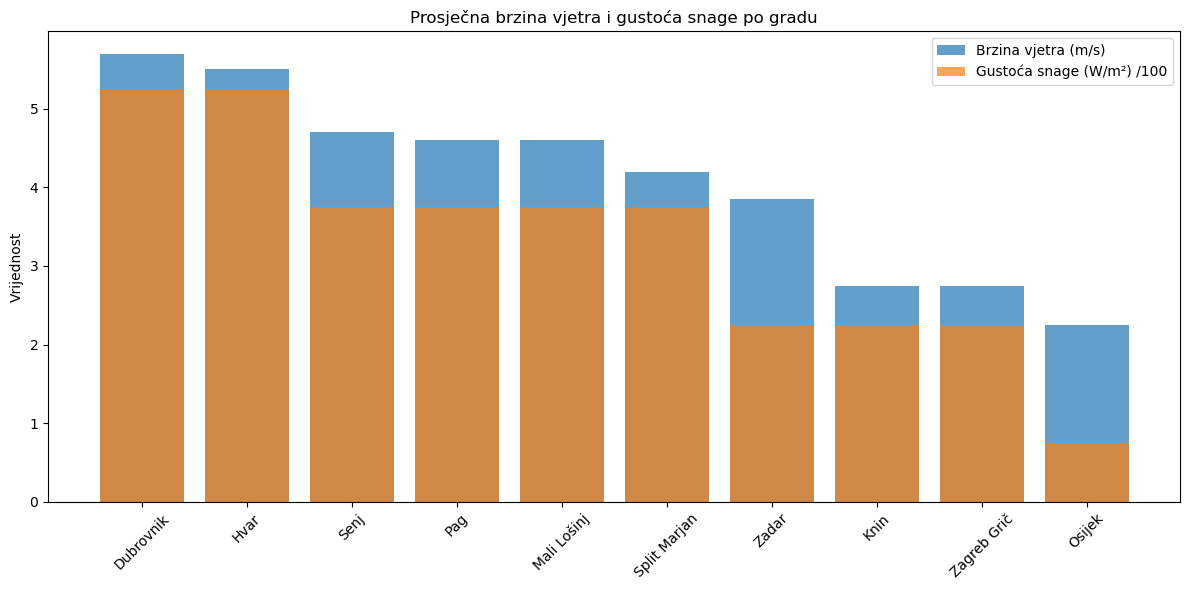

In [15]:
def sredina(raspon):
    a, b = raspon.replace(",", ".").split("–")
    return (float(a) + float(b)) / 2

df_vjetar["Brzina (avg)"] = df_vjetar["Brzina vjetra (m/s)"].apply(sredina)
df_vjetar["Snaga (avg)"] = df_vjetar["Gustoća snage (W/m²)"].apply(sredina)

plt.figure(figsize=(12, 6))
plt.bar(df_vjetar["Grad"], df_vjetar["Brzina (avg)"], label="Brzina vjetra (m/s)", alpha=0.7)
plt.bar(df_vjetar["Grad"], df_vjetar["Snaga (avg)"]/100, label="Gustoća snage (W/m²) /100", alpha=0.7)
plt.xticks(rotation=45)
plt.ylabel("Vrijednost")
plt.title("Prosječna brzina vjetra i gustoća snage po gradu")
plt.legend()
plt.tight_layout()
plt.show()

Na grafu se vidi da Dubrovnik i Hvar imaju najviše vrijednosti, što znači da tamo vjetar ima najveći potencijal za proizvodnju energije. Gradovi kao Osijek i Zagreb, imaju puno manje vrijednosti pa nisu baš idealni za vjetroelektrane. Ukupno gledano, gradovi kod obale imaju veći potencijal za izgradnju vjetroelektrane.

## Podaci o emisijama ugljičnog dioksida (CO₂) u Hrvatskoj

Podaci o emisijama ugljičnog dioksida korišteni u ovom radu preuzeti su iz baze **EDGAR (Emissions Database for Global Atmospheric Research)**. Korištena je Excel datoteka preuzeta s mrežne stranice:
https://edgar.jrc.ec.europa.eu/report_2024

U toj Excel datoteci sadržane su podatci o emisijama CO₂ po državama i sektorima.

U ovom projektu analizirani su podaci za **Republiku Hrvatsku** za razdoblje **2013.–2023. godine**. 

Sektori
- Buildings
- Fuel Exploitation
- Industrial Combustion
- Power Industry
- Processes
- Transport
- Waste

In [16]:
import pandas as pd

file_path = "EDGAR_2024_GHG_booklet_2024_fossilCO2only.xlsx"

df = pd.read_excel(
    file_path,
    sheet_name="fossil_CO2_by_sector_country_su"
)

df_hr = df[df["Country"] == "Croatia"]
df_hr.head()

Substance                 Sector EDGAR Country Code  Country      1970  \
39        CO2            Agriculture                HRV  Croatia  0.038897   
194       CO2              Buildings                HRV  Croatia  2.105546   
399       CO2      Fuel Exploitation                HRV  Croatia  2.147014   
602       CO2  Industrial Combustion                HRV  Croatia  4.833990   
809       CO2         Power Industry                HRV  Croatia  1.203777   

         1971      1972      1973      1974      1975  ...      2014  \
39   0.038897  0.038897  0.038897  0.039307  0.041013  ...  0.078571   
194  2.105546  2.172537  2.038480  2.692340  2.795306  ...  2.536832   
399  2.188697  2.352431  2.468807  3.123584  3.612839  ...  1.513754   
602  4.833990  4.405705  5.087381  5.412363  5.305082  ...  2.220976   
809  1.203777  1.488825  2.312543  1.764317  1.710600  ...  3.238204   

         2015      2016      2017      2018      2019      2020      2021  \
39   0.095857  0.099000  0.090514  0.090200  0.091300  0.098371  0.071657   
194  2.727351  2.793819  2.824695  2.749294  2.661086  2.729123  2.858121   
399  1.452939  1.301139  1.345726  1.311011  1.058717  0.880464  0.899498   
602  2.146950  2.145585  2.313355  2.333649  2.322252  2.333373  2.366855   
809  3.296430  3.549342  3.139766  2.593236  2.857274  2.844890  2.936748   

         2022      2023  
39   0.066192  0.061032  
194  2.726998  2.764212  
399  0.885354  0.904732  
602  2.367109  2.367117  
809  2.706860  2.512808  

[5 rows x 58 columns]

Budući da su stupac godine integer, koristeći .melt sam pretvorio u long format da bude preglednije za daljnu analizu

In [17]:

df_long = df_hr.melt(
    id_vars=["Substance", "Sector", "Country"],
    value_vars=list(range(2013, 2024)),
    var_name="Godina",
    value_name="CO2_emisije_Mt"
)

df_long.head(10)


Substance                 Sector  Country Godina  CO2_emisije_Mt
0       CO2            Agriculture  Croatia   2013        0.092714
1       CO2              Buildings  Croatia   2013        2.793217
2       CO2      Fuel Exploitation  Croatia   2013        1.447503
3       CO2  Industrial Combustion  Croatia   2013        2.266213
4       CO2         Power Industry  Croatia   2013        3.824998
5       CO2              Processes  Croatia   2013        2.323559
6       CO2              Transport  Croatia   2013        5.630872
7       CO2                  Waste  Croatia   2013        0.000029
8       CO2            Agriculture  Croatia   2014        0.078571
9       CO2              Buildings  Croatia   2014        2.536832

Najbitniji stupci za daljnju obradu

In [18]:
df_ugljik = df_long[[
    "Godina",
    "Sector",
    "CO2_emisije_Mt"
]].copy()

df_ugljik["Godina"] = df_ugljik["Godina"].astype(int)

df_ugljik.head(10)

Godina                 Sector  CO2_emisije_Mt
0    2013            Agriculture        0.092714
1    2013              Buildings        2.793217
2    2013      Fuel Exploitation        1.447503
3    2013  Industrial Combustion        2.266213
4    2013         Power Industry        3.824998
5    2013              Processes        2.323559
6    2013              Transport        5.630872
7    2013                  Waste        0.000029
8    2014            Agriculture        0.078571
9    2014              Buildings        2.536832

## Priprema za izradu baze podaka

Prvo moramo importat potrebne biblioteke, u ovom slučaju sqlite3 budući da radimo bazu podataka. Osim toga, kreiramo dva dataframe. Jedan za CO2, a jedan za klimatske podatke. Unos podataka za vjetar i kordinate pojedinog grada

In [19]:
import sqlite3
import pandas as pd
import numpy as np


vjetar_podaci = {
    "Dubrovnik": 5.7,
    "Hvar": 5.5,
    "Senj": 4.7,
    "Pag": 4.6,
    "Mali Lošinj": 4.6,
    "Split": 4.2,
    "Zadar": 3.85,
    "Knin": 2.75,
    "Zagreb": 2.75,
    "Osijek": 2.25
}

koordinate = {
    "Dubrovnik": (42.64, 18.11),
    "Hvar": (43.17, 16.44),
    "Senj": (44.99, 14.91),
    "Pag": (44.44, 15.06),
    "Mali Lošinj": (44.53, 14.47),
    "Split": (43.51, 16.44),
    "Zadar": (44.12, 15.22),
    "Knin": (44.04, 16.20),
    "Zagreb": (45.81, 15.98),
    "Osijek": (45.55, 18.69)
}

lista_za_df = []


Pretvorba numeričkih vrijednosti u kategorije (nizak, srednji i visok potencijal) provedena je kako bi se olakšala analiza podataka.

Grad s više od 2400 sunčanih sati godišnje smatra se visoko potencijalnim za korištenje solarnih panela. Isto tako, ako je prosječna brzina vjetra iznad 5 m/s, to znači da grad ima visok potencijal za izgradnju vjetroelektrana.

Gustoća snage vjetra temelji se na brzini vjetra, pri čemu je prilagođena ovisno o lokaciji grada. Budući da je Osijek smješten u Slavoniji, koja pripada kontinentalnom dijelu Hrvatske, za njega je uzeta niža vrijednost
zbog slabijih i rjeđih vjetrova u tom području.


In [20]:

for grad in koordinate.keys():
    sati = sunce_sati.get(grad, 1900)

    vjetar = vjetar_podaci.get(grad, 0)
    lat, lon = koordinate.get(grad)

    pot_sunce = "Visok" if sati > 2400 else ("Srednji" if sati > 2000 else "Nizak")
    pot_vjetar = "Visok" if vjetar > 5.0 else ("Srednji" if vjetar > 4.0 else "Nizak")

    gustoca = 525 if vjetar > 5 else (375 if vjetar > 4 else 225)
    if grad == "Osijek":
        gustoca = 75

    lista_za_df.append([
        grad, vjetar, gustoca, pot_vjetar,
        sati, pot_sunce, lat, lon
    ])

df_gradovi = pd.DataFrame(lista_za_df, columns=[
    "lokacija",
    "brzina_vjetra",
    "gustoca_snage_W_m2",
    "potencijal_vjetar",
    "osuncenost_sati",
    "potencijal_sunca",
    "latitude",
    "longitude"
])

print("\nIntegrirani podaci spremni za bazu:")
display(df_gradovi)



Integrirani podaci spremni za bazu:


lokacija  brzina_vjetra  gustoca_snage_W_m2 potencijal_vjetar  \
0    Dubrovnik           5.70                 525             Visok   
1         Hvar           5.50                 525             Visok   
2         Senj           4.70                 375           Srednji   
3          Pag           4.60                 375           Srednji   
4  Mali Lošinj           4.60                 375           Srednji   
5        Split           4.20                 375           Srednji   
6        Zadar           3.85                 225             Nizak   
7         Knin           2.75                 225             Nizak   
8       Zagreb           2.75                 225             Nizak   
9       Osijek           2.25                  75             Nizak   

   osuncenost_sati potencijal_sunca  latitude  longitude  
0             2641            Visok     42.64      18.11  
1             2752            Visok     43.17      16.44  
2             2273          Srednji     44.99      14.91  
3             1759            Nizak     44.44      15.06  
4             2624            Visok     44.53      14.47  
5             2644            Visok     43.51      16.44  
6             2590            Visok     44.12      15.22  
7             2437            Visok     44.04      16.20  
8             1940            Nizak     45.81      15.98  
9             1900            Nizak     45.55      18.69

Kako bi se procijenila pogodnost pojedine lokacije za izgradnju solarnih i vjetroelektrana, izračunata je godišnja ušteda emisija CO₂ uz pretpostavku instalirane snage od 1 MW.

In [21]:

CO2_FAKTOR_MREZA_KG = 0.230
INSTALIRANA_SNAGA_MW = 1.0

def izracun_ustede(row):
    proizvodnja_solar_MWh = row["osuncenost_sati"] * INSTALIRANA_SNAGA_MW * 0.8
    faktor_vjetar = (
        0.30 if row["brzina_vjetra"] > 5 else
        0.20 if row["brzina_vjetra"] > 4 else
        0.10
    )
    proizvodnja_vjetar_MWh = 8760 * INSTALIRANA_SNAGA_MW * faktor_vjetar

    usteda_solar_t = (proizvodnja_solar_MWh * 1000 * CO2_FAKTOR_MREZA_KG) / 1000
    usteda_vjetar_t = (proizvodnja_vjetar_MWh * 1000 * CO2_FAKTOR_MREZA_KG) / 1000

    return pd.Series([usteda_solar_t, usteda_vjetar_t])

df_gradovi[
    ["usteda_co2_solar_tona", "usteda_co2_vjetar_tona"]
] = df_gradovi.apply(izracun_ustede, axis=1)

print("Stupci su uspješno dodani. Sada možeš pokrenuti kod za kartu.")


Stupci su uspješno dodani. Sada možeš pokrenuti kod za kartu.


**Kreiranje tablice**

Nakon kreiranja dva dataframa kreiramo samu bazu pod nazivom "projekt.db" i provjeravamo konekciju

In [22]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("projekt_bp.db")
cursor = conn.cursor()

cursor.execute("PRAGMA foreign_keys = ON")

print("Baza stvorena")


Baza stvorena


Kreiranje tablice "ugljik" i tablice "klima"

In [23]:
cursor.execute("""
DROP TABLE IF EXISTS ugljik
""")

cursor.execute("""
CREATE TABLE ugljik (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    godina INTEGER NOT NULL,
    sektor TEXT NOT NULL,
    co2_emisije_Mt REAL NOT NULL
)
""")

conn.commit()

print("Tablica 'ugljik' kreirana")


Tablica 'ugljik' kreirana


In [24]:
cursor.execute("""
DROP TABLE IF EXISTS klima
""")

cursor.execute("""
CREATE TABLE klima (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    lokacija TEXT UNIQUE NOT NULL,
    osuncenost_sati_godisnje INTEGER,
    brzina_vjetra_ms REAL,
    gustoca_snage_W_m2 INTEGER,
    potencijal_vjetar TEXT,
    potencijal_sunca TEXT,
    latitude REAL NOT NULL,
    longitude REAL NOT NULL
)
""")

conn.commit()

print("Tablica 'klima' kreirana")

Tablica 'klima' kreirana


Micanje redova bez vrijednosti

In [25]:
df_ugljik_cisto = df_ugljik.dropna(subset=["CO2_emisije_Mt"]).copy()

print("Redovi prije:", len(df_ugljik))
print("Redovi nakon:", len(df_ugljik_cisto))


Redovi prije: 88
Redovi nakon: 81


In [26]:
for i in range(len(df_ugljik_cisto)):
    godina = int(df_ugljik_cisto.iloc[i]["Godina"])
    sektor = df_ugljik_cisto.iloc[i]["Sector"]
    emisije = float(df_ugljik_cisto.iloc[i]["CO2_emisije_Mt"])

    cursor.execute(
        """
        INSERT INTO ugljik (godina, sektor, co2_emisije_Mt)
        VALUES (?, ?, ?)
        """,
        (godina, sektor, emisije)
    )

conn.commit()

print("Podaci uneseni u tablicu 'ugljik'")


Podaci uneseni u tablicu 'ugljik'


Provjera unesenih podataka

In [27]:
pd.read_sql(
    "SELECT godina, sektor, co2_emisije_Mt FROM ugljik ORDER BY godina, sektor LIMIT 10",
    conn
)


godina                 sektor  co2_emisije_Mt
0    2013            Agriculture        0.092714
1    2013              Buildings        2.793217
2    2013      Fuel Exploitation        1.447503
3    2013  Industrial Combustion        2.266213
4    2013         Power Industry        3.824998
5    2013              Processes        2.323559
6    2013              Transport        5.630872
7    2013                  Waste        0.000029
8    2014            Agriculture        0.078571
9    2014              Buildings        2.536832

In [28]:
cursor.execute("DELETE FROM klima")
conn.commit()


for i in range(len(df_gradovi)):
    lokacija = df_gradovi.iloc[i]["lokacija"]
    sati = int(df_gradovi.iloc[i]["osuncenost_sati"])
    vjetar = float(df_gradovi.iloc[i]["brzina_vjetra"])
    gustoca = int(df_gradovi.iloc[i]["gustoca_snage_W_m2"])
    pot_vjetar = df_gradovi.iloc[i]["potencijal_vjetar"]
    pot_sunce = df_gradovi.iloc[i]["potencijal_sunca"]
    lat = float(df_gradovi.iloc[i]["latitude"])
    lon = float(df_gradovi.iloc[i]["longitude"])

    cursor.execute(
        """
        INSERT INTO klima (
            lokacija,
            osuncenost_sati_godisnje,
            brzina_vjetra_ms,
            gustoca_snage_W_m2,
            potencijal_vjetar,
            potencijal_sunca,
            latitude,
            longitude
        )
        VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        """,
        (
            lokacija,
            sati,
            vjetar,
            gustoca,
            pot_vjetar,
            pot_sunce,
            lat,
            lon
        )
    )

conn.commit()
print("Podaci uneseni u tablicu 'klima'")


Podaci uneseni u tablicu 'klima'


Provjera unesenih podataka

In [29]:
pd.read_sql(
    "SELECT * FROM klima LIMIT 10",
    conn
)

id     lokacija  osuncenost_sati_godisnje  brzina_vjetra_ms  \
0   1    Dubrovnik                      2641              5.70   
1   2         Hvar                      2752              5.50   
2   3         Senj                      2273              4.70   
3   4          Pag                      1759              4.60   
4   5  Mali Lošinj                      2624              4.60   
5   6        Split                      2644              4.20   
6   7        Zadar                      2590              3.85   
7   8         Knin                      2437              2.75   
8   9       Zagreb                      1940              2.75   
9  10       Osijek                      1900              2.25   

   gustoca_snage_W_m2 potencijal_vjetar potencijal_sunca  latitude  longitude  
0                 525             Visok            Visok     42.64      18.11  
1                 525             Visok            Visok     43.17      16.44  
2                 375           Srednji          Srednji     44.99      14.91  
3                 375           Srednji            Nizak     44.44      15.06  
4                 375           Srednji            Visok     44.53      14.47  
5                 375           Srednji            Visok     43.51      16.44  
6                 225             Nizak            Visok     44.12      15.22  
7                 225             Nizak            Visok     44.04      16.20  
8                 225             Nizak            Nizak     45.81      15.98  
9                  75             Nizak            Nizak     45.55      18.69

## Analiza podataka

Nakon skupaljanj podataka i kreiranja baze potrebano je analizirati podatke i pronaći optimalne lokacija za posataviti solarne i vjetroelektrane. Na temelju analize izdvojene su lokacije sa najvećim potencijalom za kategoriju. Kategorije su: solarno, vjetar i kombinacija.

In [30]:
df_opt = df_gradovi.copy()

df_opt["solar_score"] = (df_opt["osuncenost_sati"] - df_opt["osuncenost_sati"].min()) / (df_opt["osuncenost_sati"].max() - df_opt["osuncenost_sati"].min())
df_opt["wind_score"]  = (df_opt["brzina_vjetra"] - df_opt["brzina_vjetra"].min()) / (df_opt["brzina_vjetra"].max() - df_opt["brzina_vjetra"].min())

df_opt["combo_score"] = 0.5 * df_opt["solar_score"] + 0.5 * df_opt["wind_score"]

TOP_N = 3

top_solar = df_opt.sort_values("solar_score", ascending=False).head(TOP_N)
top_vjet  = df_opt.sort_values("wind_score", ascending=False).head(TOP_N)
top_mix = df_opt.sort_values("combo_score", ascending=False).head(TOP_N)

print("Najbolje solar lokacije:")
display(top_solar[["lokacija", "osuncenost_sati", "solar_score", "potencijal_sunca"]])

print("Najbolje vjetar lokacije:")
display(top_vjet[["lokacija", "brzina_vjetra", "wind_score", "potencijal_vjetar"]])

print("Najbolje kombinirane lokacije:")
display(top_mix[["lokacija", "osuncenost_sati", "brzina_vjetra", "combo_score"]])

Najbolje solar lokacije:


lokacija  osuncenost_sati  solar_score potencijal_sunca
1       Hvar             2752     1.000000            Visok
5      Split             2644     0.891239            Visok
0  Dubrovnik             2641     0.888218            Visok

Najbolje vjetar lokacije:


lokacija  brzina_vjetra  wind_score potencijal_vjetar
0  Dubrovnik            5.7    1.000000             Visok
1       Hvar            5.5    0.942029             Visok
2       Senj            4.7    0.710145           Srednji

Najbolje kombinirane lokacije:


lokacija  osuncenost_sati  brzina_vjetra  combo_score
1         Hvar             2752            5.5     0.971014
0    Dubrovnik             2641            5.7     0.944109
4  Mali Lošinj             2624            4.6     0.776129

In [31]:
potenc_lokacije = sorted(set(top_solar["lokacija"]) | set(top_vjet["lokacija"]) | set(top_mix["lokacija"]))

df_ident = df_opt[df_opt["lokacija"].isin(potenc_lokacije)].copy()

print("Lokacije koje su najbolje:")
display(df_ident[["lokacija", "osuncenost_sati", "brzina_vjetra", "potencijal_sunca", "potencijal_vjetar"]])


Lokacije koje su najbolje:


lokacija  osuncenost_sati  brzina_vjetra potencijal_sunca  \
0    Dubrovnik             2641            5.7            Visok   
1         Hvar             2752            5.5            Visok   
2         Senj             2273            4.7          Srednji   
4  Mali Lošinj             2624            4.6            Visok   
5        Split             2644            4.2            Visok   

  potencijal_vjetar  
0             Visok  
1             Visok  
2           Srednji  
4           Srednji  
5           Srednji

Nakon analize vidljivo je kako su gradovi na obali Dubrovnik, Hvar i splitski Marjan najveći potencijali za korištenje solara i vjetroelektrane. To je zato što imaju visoku osunčanost tijekom godine i povoljan vjetar.

**Procjena smanjenja emisije CO2**

Za isplativu izgradnju, potrebno je bilo izračunati potencijalno smanjenje emisije CO2. Godišnja ušteda dobivena je zbrajanjem uštede ostvarenje el. energije iz solarnih panela i vjetroelektrana.

In [32]:

usteda_solar_total_t = df_ident["usteda_co2_solar_tona"].sum()
usteda_vjetar_total_t = df_ident["usteda_co2_vjetar_tona"].sum()
usteda_total_t = usteda_solar_total_t + usteda_vjetar_total_t

print("Procjena godišnje uštede CO₂ za najbolje odabrane lokacije:")
print(f"Solar: {usteda_solar_total_t:,.0f} t CO₂/god")
print(f"Vjetar: {usteda_vjetar_total_t:,.0f} t CO₂/god")
print(f"Ukupno: {usteda_total_t:,.0f} t CO₂/god")


Procjena godišnje uštede CO₂ za najbolje odabrane lokacije:
Solar: 2,380 t CO₂/god
Vjetar: 2,418 t CO₂/god
Ukupno: 4,798 t CO₂/god


Također, procijenjena je ušteda u odnosu na podatke koje je pružio EDGAR o emisijama za 2023. godinu.

In [33]:
emisije_2023_Mt = df_ugljik[df_ugljik["Godina"] == 2023]["CO2_emisije_Mt"].sum()

usteda_total_Mt = usteda_total_t / 1_000_000

postotak = (usteda_total_Mt / emisije_2023_Mt) * 100 if emisije_2023_Mt > 0 else np.nan

print("Usporedba s EDGAR emisijama (2023):")
print(f"Emisije Hrvatske prema EDGAR: {emisije_2023_Mt:.3f} Mt CO₂")
print(f"Procijena uštede: {usteda_total_Mt:.3f} Mt CO₂")
print(f"Potencijalno smanjenje: {postotak:.2f}% u odnosu na emisije 2023")


Usporedba s EDGAR emisijama (2023):
Emisije Hrvatske prema EDGAR: 17.457 Mt CO₂
Procijena uštede: 0.005 Mt CO₂
Potencijalno smanjenje: 0.03% u odnosu na emisije 2023


## Vizualizacija

In [34]:
import folium

mapa_hr = folium.Map(
    location=[45.1, 15.5],
    zoom_start=7,
    tiles="OpenStreetMap"
)


def boja_potencijala(potencijal):
    if potencijal == "Visok":
        return "green"
    elif potencijal == "Srednji":
        return "orange"
    else:
        return "red"

for _, row in df_gradovi.iterrows():
    
    popup_text = f"""
<div style="width:260px; font-size:14px; line-height:1.6;">
    <b style="font-size:16px;">{row['lokacija']}</b><br>
    Potencijal sunca: {row['potencijal_sunca']}<br><br>
    Potencijal vjetra: {row['potencijal_vjetar']}<br><br>
    Ušteda CO₂ (solar): {row['usteda_co2_solar_tona']:.0f} t/god<br><br>
    Ušteda CO₂ (vjetar): {row['usteda_co2_vjetar_tona']:.0f} t/god
</div>
"""
    
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=8,
        color=boja_potencijala(row["potencijal_sunca"]),
        fill=True,
        fill_color=boja_potencijala(row["potencijal_sunca"]),
        fill_opacity=0.8,
        popup=popup_text
    ).add_to(mapa_hr)

mapa_hr

mapa_hr.save("potencijali_solar_vjetro.html")
print("Karta 'potencijali_solar_vjetro.html' je spremljena.")

Karta 'potencijali_solar_vjetro.html' je spremljena.


## Zaključak

Kroz izradu projekta analizirani su klimatski podatci o osunčanosti i brzini vjetra u svrhu određivanja najpovoljnijih lokacija za postavljanje solarnih
i vjetroelektrana. 

Rezultati pokazuju da gradovi na obali imaju veći potencijal za korištenje obnovljivih izvora energije u odnosu na kontinentalne gradove.

Ovim projektom pokazano je kako se analizom podataka mogu donositi odluke temeljene na podacima, vezane uz smanjenje ugljičnog otiska.


Stjepan Marić IPS UIUP 2025./2026.